In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

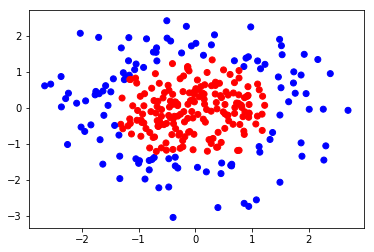

In [53]:
seed = 0
X = np.random.RandomState(seed = 0).randn(300,2)
Y_ = [int(x0**2 + x1**2<2) for (x0,x1) in X]
Y_color = ['red' if y else 'blue' for y in Y_]
Y_ = np.asarray(Y_).reshape(-1,1)
plt.scatter(X[:,0],X[:,1], c = Y_color)

In [55]:
def get_weight(shape,regularizer):
    w = tf.Variable(tf.random_normal(shape),dtype = tf.float32)
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

In [56]:
def get_bias(shape):
    b = tf.Variable(tf.constant(0.0,shape = shape))
    return b

In [57]:
x = tf.placeholder(tf.float32,shape = (None,2))
y_ = tf.placeholder(tf.float32, shape = (None,1))

In [58]:
w1 = get_weight([2,11],0.01)
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = get_weight([11,1],0.01)
b2 = get_bias([1])
y = tf.matmul(y1,w2)+b2

In [66]:
loss_mse = tf.reduce_mean(tf.square(y-y_))
loss_total =loss_mse + tf.add_n(tf.get_collection('losses'))
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)
BATCH_SIZE = 30
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 30000
    for i in range(STEPS):
        start = (i *BATCH_SIZE)%300
        stop = start + BATCH_SIZE
        sess.run(train_step,feed_dict = {x: X[start:stop],y_:Y_[start:stop]})
        if i %500 ==0:
            print('After %d steps, loss is: %f' %(i,sess.run(loss_mse,feed_dict={x:X, y_:Y_})))
    xx, yy = np.mgrid[-3:3:0.01,-3:3:0.01]
    grid = np.c_[xx.ravel(),yy.ravel()]
    probs = sess.run(y,feed_dict = {x:grid})
    probs = probs.reshape(xx.shape)

After 0 steps, loss is: 25.702284
After 500 steps, loss is: 18.296017
After 1000 steps, loss is: 12.632897
After 1500 steps, loss is: 8.436368
After 2000 steps, loss is: 5.390880
After 2500 steps, loss is: 3.375789
After 3000 steps, loss is: 2.145041
After 3500 steps, loss is: 1.403590
After 4000 steps, loss is: 0.955039
After 4500 steps, loss is: 0.684984
After 5000 steps, loss is: 0.519213
After 5500 steps, loss is: 0.410570
After 6000 steps, loss is: 0.332084
After 6500 steps, loss is: 0.272713
After 7000 steps, loss is: 0.224454
After 7500 steps, loss is: 0.185817
After 8000 steps, loss is: 0.157744
After 8500 steps, loss is: 0.137980
After 9000 steps, loss is: 0.124031
After 9500 steps, loss is: 0.113545
After 10000 steps, loss is: 0.105223
After 10500 steps, loss is: 0.098061
After 11000 steps, loss is: 0.091555
After 11500 steps, loss is: 0.086271
After 12000 steps, loss is: 0.081463
After 12500 steps, loss is: 0.077792
After 13000 steps, loss is: 0.075924
After 13500 steps, los

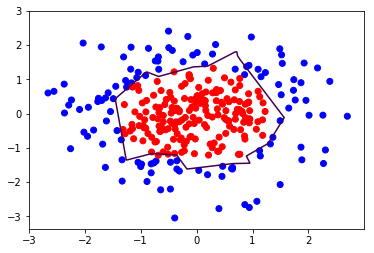

In [68]:
plt.scatter(X[:,0],X[:,1], c = Y_color)
plt.contour(xx,yy,probs,levels = [0.5])
